In [1]:
from scipy import stats
import numpy as np

accuracy_intra = 100.0  # 100%

accuracy_cross = 70.83  # 70.83%

# Intra-subject Confusion Matrix
cm_intra = np.array([[2, 0, 0, 0],
                     [0, 2, 0, 0],
                     [0, 0, 2, 0],
                     [0, 0, 0, 2]])

# Cross-subject Confusion Matrix
cm_cross = np.array([[11, 0, 0, 1],
                     [0, 11, 0, 1],
                     [0, 6, 5, 1],
                     [0, 5, 0, 7]])

# per-class accuracies
accuracies_intra = np.diag(cm_intra) / np.sum(cm_intra, axis=1)
accuracies_cross = np.diag(cm_cross) / np.sum(cm_cross, axis=1)

# paired t-test on per-class accuracies
t_statistic, p_value = stats.ttest_rel(accuracies_intra, accuracies_cross)

t_statistic, p_value



(2.3333333333333335, 0.10183797037740712)

In [2]:
def metrics_per_class(cm):
  precisions = np.zeros((cm.shape[0]))
  recalls = np.zeros((cm.shape[0]))
  f1_scores = np.zeros((cm.shape[0]))

  for i in range(cm.shape[0]):
    true_positive = cm[i,i]
    false_positive = np.sum(cm[:,i]) - true_positive
    false_negative = np.sum(cm[i,:]) - true_positive
    print(true_positive, false_positive, false_negative)

    precisions[i] = np.mean(true_positive / (true_positive + false_positive))
    recalls[i] = np.mean(true_positive / (true_positive + false_negative))
    f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])

  return precisions, recalls, f1_scores


p_intra, r_intra, f_intra = metrics_per_class(cm_intra)
print()
p_cross, r_cross, f_cross = metrics_per_class(cm_cross)


2 0 0
2 0 0
2 0 0
2 0 0

11 0 1
11 11 1
5 0 7
7 3 5


In [11]:
print("Precisions Intra", p_intra)
print("Recalls Intra", r_intra)
print("F1-scores Intra", f_intra)
print()
print(f"Precisions Cross", np.round(p_cross, 3))
print(f"Recalls Cross", np.round(r_cross, 3))
print(f"F1-scores Cross", np.round(f_cross, 3))

Precisions Intra [1. 1. 1. 1.]
Recalls Intra [1. 1. 1. 1.]
F1-scores Intra [1. 1. 1. 1.]

Precisions Cross [1.  0.5 1.  0.7]
Recalls Cross [0.917 0.917 0.417 0.583]
F1-scores Cross [0.957 0.647 0.588 0.636]


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(cm):
    true_positives = np.diag(cm)
    false_positives = np.sum(cm, axis=0) - true_positives
    false_negatives = np.sum(cm, axis=1) - true_positives

    # Precision, Recall, and F1-Score
    precision = np.mean(true_positives / (true_positives + false_positives))
    recall = np.mean(true_positives / (true_positives + false_negatives))
    f1 = 2 * (precision * recall) / (precision + recall)

    return precision, recall, f1

precision_intra, recall_intra, f1_intra = calculate_metrics(cm_intra)

precision_cross, recall_cross, f1_cross = calculate_metrics(cm_cross)

In [ ]:
precision_intra, recall_intra, f1_intra

(1.0, 1.0, 1.0)

In [ ]:
precision_cross, recall_cross, f1_cross

(0.8, 0.7083333333333334, 0.7513812154696135)

In [13]:
# Cross1 Confusion Matrix (93.75%)
cm_cross1 = np.array([[4, 0, 0, 0],
                     [0, 4, 0, 0],
                     [0, 0, 3, 1],
                     [0, 0, 0, 4]])


# Cross1 Confusion Matrix (56.25%)
cm_cross2 = np.array([[2, 1, 1, 0],
                     [1, 3, 0, 0],
                     [1, 0, 2, 1],
                     [0, 2, 0, 2]])


# Cross3 Confusion Matrix (62.5%)
cm_cross3 = np.array([[3, 1, 0, 0],
                     [0, 3, 2, 0],
                     [0, 0, 2, 2],
                     [0, 5, 0, 2]])


In [14]:
precision_cross1, recall_cross1, f1_cross1 = calculate_metrics(cm_cross1)
precision_cross2, recall_cross2, f1_cross2 = calculate_metrics(cm_cross2)
precision_cross3, recall_cross3, f1_cross3 = calculate_metrics(cm_cross3)

In [23]:
print("Cross 1")
np.round(precision_cross1, 4), np.round(recall_cross1, 4), np.round(f1_cross1, 4)

Cross 1


(0.95, 0.9375, 0.9437)

In [24]:
print("Cross 2")
np.round(precision_cross2, 4), np.round(recall_cross2, 4), np.round(f1_cross2, 4)

Cross 2


(0.5833, 0.5625, 0.5727)

In [25]:
print("Cross 3")
np.round(precision_cross3, 4), np.round(recall_cross3, 4), np.round(f1_cross3, 4)

Cross 3


(0.5833, 0.5339, 0.5575)

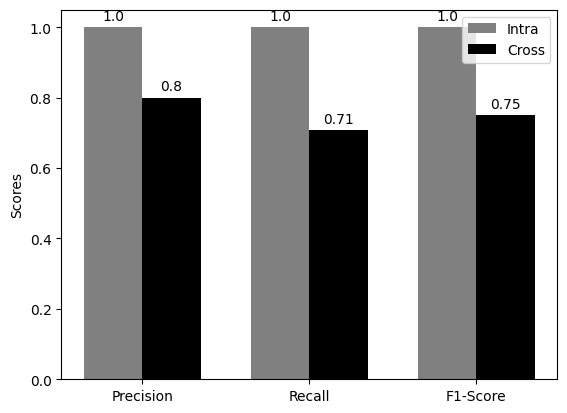

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for intra-subject classification
metrics_intra = [precision_intra, recall_intra, f1_intra]

# Metrics for cross-subject classification
metrics_cross = [precision_cross, recall_cross, f1_cross]

# Labels for the metrics
labels = ['Precision', 'Recall', 'F1-Score']

# Create a bar graph
x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, metrics_intra, width, label='Intra', color='grey')
rects2 = ax.bar(x + width/2, metrics_cross, width, label='Cross', color='black')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach text labels above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

